**Part 1 – Random Forest Model Training**

_This is the code used to train RF model with calculated descriptors_

# Data Import

In [1]:
# Common imports
import numpy as np
import pandas as pd

# Figures setting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Import the X and y

In [2]:
X = pd.read_csv('YourPath/rxnpredict/R_input/descriptor_table.csv')

In [3]:
X

,alcohol_*C1_electrostatic_charge,alcohol_*C1_exposed_area,alcohol_electronegativity,alcohol_primary,alcohol_secondary,alcohol_tertiary,alcohol_cyclic,alcohol_4-membered_ring,alcohol_5-membered_ring,alcohol_6-membered_ring,...,alcohol_homobenzylic,alcohol_homoallylic,alcohol_alpha-carbonyl,alcohol_beta_carbonyl,alcohol_hemiacetal,alcohol_alpha amino,base_*N1_exposed_area,sulfonyl_fluoride_*S1_electrostatic_charge,sulfonyl_fluoride_*F1_electrostatic_charge,sulfonyl_fluoride_*O1_electrostatic_charge
0,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7.397,0.973,-0.210,-0.439
1,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7.397,0.849,-0.198,-0.401
2,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7.397,0.978,-0.208,-0.436
3,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7.397,0.973,-0.204,-0.430
4,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7.397,0.926,-0.162,-0.384
5,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,6.069,0.973,-0.210,-0.439
6,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,6.069,0.849,-0.198,-0.401
7,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,6.069,0.978,-0.208,-0.436
8,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,6.069,0.973,-0.204,-0.430
9,0.101,13.680,0.12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,6.069,0.926,-0.162,-0.384


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 23 columns):
alcohol_*C1_electrostatic_charge              640 non-null float64
alcohol_*C1_exposed_area                      640 non-null float64
alcohol_electronegativity                     640 non-null float64
alcohol_primary                               640 non-null int64
alcohol_secondary                             640 non-null int64
alcohol_tertiary                              640 non-null int64
alcohol_cyclic                                640 non-null int64
alcohol_4-membered_ring                       640 non-null int64
alcohol_5-membered_ring                       640 non-null int64
alcohol_6-membered_ring                       640 non-null int64
alcohol_7-membered_ring                       640 non-null int64
alcohol_benzylic                              640 non-null int64
alcohol_allylic                               640 non-null int64
alcohol_homobenzylic                        

As we can see the data type of X is a mixture of float and integer, we just convert all into float. 

In [5]:
X = X.astype(np.float)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 23 columns):
alcohol_*C1_electrostatic_charge              640 non-null float64
alcohol_*C1_exposed_area                      640 non-null float64
alcohol_electronegativity                     640 non-null float64
alcohol_primary                               640 non-null float64
alcohol_secondary                             640 non-null float64
alcohol_tertiary                              640 non-null float64
alcohol_cyclic                                640 non-null float64
alcohol_4-membered_ring                       640 non-null float64
alcohol_5-membered_ring                       640 non-null float64
alcohol_6-membered_ring                       640 non-null float64
alcohol_7-membered_ring                       640 non-null float64
alcohol_benzylic                              640 non-null float64
alcohol_allylic                               640 non-null float64
alcohol_homobenzylic    

When importing y data, we need to specify "header=None" to match the data with X. 

In [7]:
y = pd.read_csv('YourPath/rxnpredict/R_input/observed_yields.csv', header=None)
y

,0
0,42
1,48
2,47
3,52
4,52
5,76
6,78
7,87
8,82
9,80


In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 1 columns):
0    640 non-null int64
dtypes: int64(1)
memory usage: 5.1 KB


# Data Preprocessing

In this data preprocessing part, we use standard scaler to process X. For y, we need to use .ravel() to extract the values of y.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y.values.ravel()

# Data splitting

Split data into 70/30 for train and test.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

y_train, y_test = y_train.astype(np.int), y_test.astype(np.int)

# Random Forest

Based on reported work by same group, we will use random forest model directly. 

In [11]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=2, random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
R2_rf = r2_score(y_test, y_pred_rf)

print('RMSE:', RMSE_rf)
print('R2 Score:', R2_rf)

RMSE: 24.288883924260798
R2 Score: 0.35814420939743996


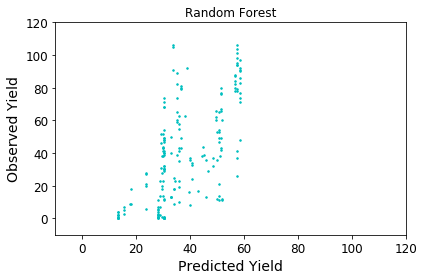

In [13]:
plt.plot(y_pred_rf, y_test, 'c.', markersize=3)
plt.title('Random Forest')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')

plt.savefig('./Figs/First Random Forest Model', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

## RF Model Optimization w/ Random Search

For RF model, we use random search instead of grid search to look for good parameters.

In [14]:
# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 4000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels 
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 6, 8, 10, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

The following codes may take some time. And the result vary every time, since it's a random search.

In [15]:
import warnings
warnings.filterwarnings('ignore') #These two lines are to remove warning information. You can delete these.

from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_grid = RandomForestRegressor(random_state=42)

rf_grid_search = RandomizedSearchCV(rf_grid, random_grid, n_iter=30, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error', return_train_score=True)
rf_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=-1,
          param_distributions={'n_estimators': [200, 622, 1044, 1466, 1888, 2311, 2733, 3155, 3577, 4000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 6, 8, 10, 12], 'min_samples_leaf': [1, 2, 4, 8, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [16]:
print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)

{'n_estimators': 2311, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}
-89.41800623168157


After random search, we use the best parameters to build another RF model and see the performance. 

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg = RandomForestRegressor(n_estimators=622, min_samples_split=2, min_samples_leaf=1,
                               max_features='auto', bootstrap=True,
                               max_depth=60, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

RMSE_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
R2_rf = r2_score(y_test, y_pred_rf)

print('RMSE:', RMSE_rf)
print('R2 Score:', R2_rf)

RMSE: 9.306613210872815
R2 Score: 0.9057664235474547


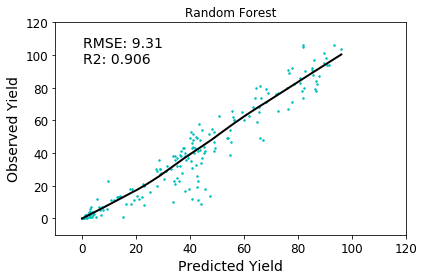

In [18]:
plt.plot(y_pred_rf, y_test, 'c.', markersize=3)
plt.title('Random Forest')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 9.31\nR2: 0.906", size=14, va="baseline", ha="right", multialignment="left")

# Plot Lowess curve
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(y_test, y_pred_rf, frac=0.5, it=2)
plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/Optimized Random Forest Model', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

## Evaluate Descriptor Importance

In this part, we check the important descriptors. 

In [19]:
descriptor_imp = pd.Series(rf_reg.feature_importances_,index=X.columns).sort_values(ascending=False)
descriptor_imp[:10]

alcohol_*C1_exposed_area                      0.274097
alcohol_*C1_electrostatic_charge              0.186584
alcohol_electronegativity                     0.100070
base_*N1_exposed_area                         0.094857
sulfonyl_fluoride_*O1_electrostatic_charge    0.052677
sulfonyl_fluoride_*F1_electrostatic_charge    0.052117
alcohol_secondary                             0.045599
alcohol_6-membered_ring                       0.037125
alcohol_allylic                               0.024374
alcohol_beta_carbonyl                         0.017680
dtype: float64

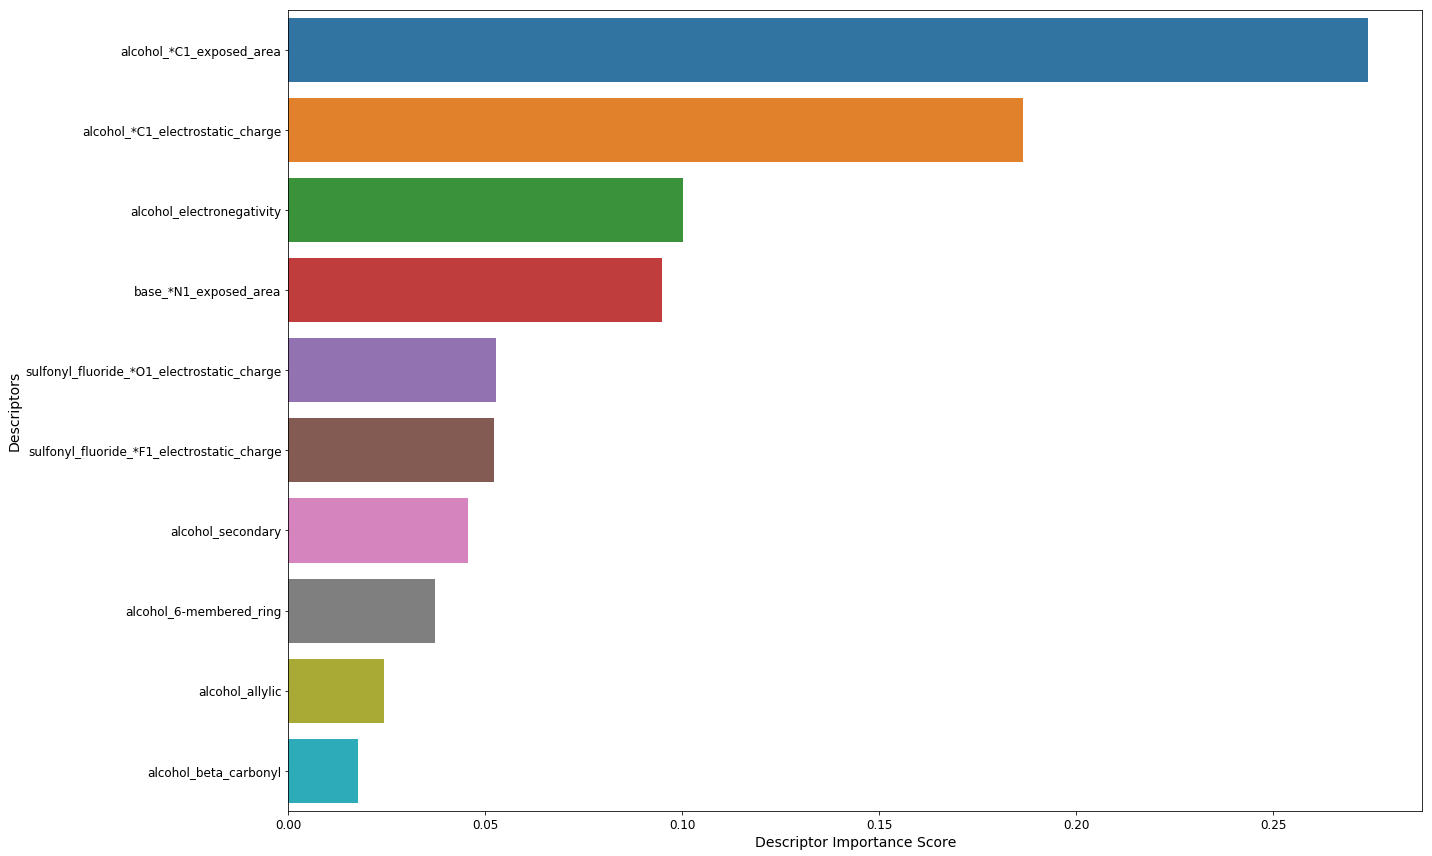

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,12))

# Creating a bar plot
sns.barplot(x=descriptor_imp[:10], y=descriptor_imp.index[:10])

# Add labels to your graph
plt.xlabel('Descriptor Importance Score')
plt.ylabel('Descriptors')
plt.savefig('./Figs/Descriptor Importance Score (Top10)', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

Now, we are going to use the descriptors which weigh 95% of the RF model, to train another RF model.

In [21]:
number_list = []
for number in range(1,23):
    if np.cumsum(descriptor_imp[:number].values)[-1] >=0.95:
        number_list.append(number)
number_list[0]

15

In [22]:
descriptor_imp.index

Index(['alcohol_*C1_exposed_area', 'alcohol_*C1_electrostatic_charge',
       'alcohol_electronegativity', 'base_*N1_exposed_area',
       'sulfonyl_fluoride_*O1_electrostatic_charge',
       'sulfonyl_fluoride_*F1_electrostatic_charge', 'alcohol_secondary',
       'alcohol_6-membered_ring', 'alcohol_allylic', 'alcohol_beta_carbonyl',
       'sulfonyl_fluoride_*S1_electrostatic_charge', 'alcohol_benzylic',
       'alcohol_5-membered_ring', 'alcohol_cyclic ', 'alcohol_alpha-carbonyl',
       'alcohol_4-membered_ring', 'alcohol_tertiary', 'alcohol_alpha amino',
       'alcohol_7-membered_ring', 'alcohol_homobenzylic', 'alcohol_primary',
       'alcohol_homoallylic', 'alcohol_hemiacetal'],
      dtype='object')

In [23]:
descriptor_imp = descriptor_imp[:15].index

X_imp = X[descriptor_imp]

# Data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_imp_scaled = scaler.fit_transform(X_imp)
# Data splitting
from sklearn.model_selection import train_test_split
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_imp_scaled, y, test_size=0.3, random_state=42)
# Convert y into integer
y_train, y_test = y_train.astype(np.int), y_test.astype(np.int)

In [24]:
# Use the optimized RF parameters

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_imp = RandomForestRegressor(n_estimators=622, min_samples_split=2, min_samples_leaf=1,
                               max_features='auto', bootstrap=True,
                               max_depth=60, random_state=42)
rf_imp.fit(X_train_imp, y_train)
y_pred_rf_imp = rf_imp.predict(X_test_imp)

RMSE_rf_imp = np.sqrt(mean_squared_error(y_test, y_pred_rf_imp))
R2_rf_imp = r2_score(y_test, y_pred_rf_imp)

print('RMSE:', RMSE_rf_imp)
print('R2 Score:', R2_rf_imp)

RMSE: 9.244277121718518
R2 Score: 0.9070245568401973


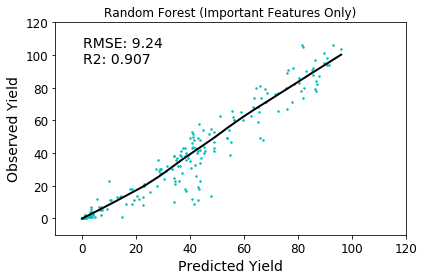

In [25]:
plt.plot(y_pred_rf_imp, y_test, 'c.', markersize=3)
plt.title('Random Forest (Important Features Only)')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 9.24\nR2: 0.907", size=14, va="baseline", ha="right", multialignment="left")

# How to plot Lowess curve
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(y_test, y_pred_rf_imp, frac=0.5, it=2)
plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/Random Forest with Important Features', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

# Evaluate External Data

In [26]:
# Data import
X_ex = pd.read_csv('D:/Dropbox/Jupyter/Tutorial-JACS/rxnpredict/R_input/descriptor_table_external_set.csv').astype(np.float)
y_ex = pd.read_csv('D:/Dropbox/Jupyter/Tutorial-JACS/rxnpredict/R_input/external_set_observed_yields.csv', header=None)

# Data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ex_scaled = scaler.fit_transform(X_ex)
y_ex = y_ex.values.ravel()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# External Data Performance
y_pred_ex = rf_reg.predict(X_ex_scaled)

RMSE_ex = np.sqrt(mean_squared_error(y_ex, y_pred_ex))
R2_ex = r2_score(y_ex, y_pred_ex)

print('RMSE:', RMSE_ex)
print('R2 Score:', R2_ex)

RMSE: 19.043313435364475
R2 Score: 0.3305794845079232


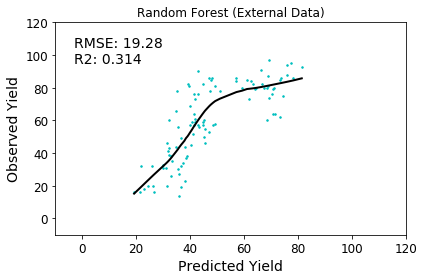

In [29]:
plt.plot(y_pred_ex, y_ex, 'c.', markersize=3)
plt.title('Random Forest (External Data)')
plt.axis([-10, 120, -10, 120])
plt.xlabel('Predicted Yield')
plt.ylabel('Observed Yield')
plt.text(30, 95, "RMSE: 19.28\nR2: 0.314", size=14, va="baseline", ha="right", multialignment="left")

# How to plot Lowess curve
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
Z = lowess(y_ex, y_pred_ex, frac=0.5, it=2)
plt.plot(Z[:,0],Z[:,1],'k-',lw=2)

plt.savefig('./Figs/Random Forest (External Data)', dpi=600, bbox_inches = 'tight')
plt.tight_layout()
plt.show()